Imports


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [8]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

In [9]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

In [ ]:
#Global_active_power representa a potência ativa média global por minuto da residência (em kilowatt),que é a potência utilizada para realizar trabalho útil.
#Já Global_reactive_power representa a potência reativa média global por minuto da residência (em kilowatt),
#que é a potência necessária para manter campos eletromagnéticos em circuitos de corrente alternada,
#mas que não realiza trabalho útil.

3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [15]:
df = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    na_values=['?'],
    low_memory=False
)
df.isna().sum()


,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [29]:
# Converter Date + Time em datetime completo
df['Datetime'] = pd.to_datetime(
    df['Date'].astype(str) + ' ' + df['Time'].astype(str),
    dayfirst=True, errors='coerce'
)

# Criar coluna com o dia da semana (0=segunda, 6=domingo)
df['Dia_da_semana'] = df['Datetime'].dt.dayofweek

df.head()


/tmp/ipython-input-1570840242.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Dia_da_semana,Datetime
Datetime,,,,,,,,,,,
NaT,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5,2006-12-16 17:24:00
NaT,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5,2006-12-16 17:25:00
NaT,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5,2006-12-16 17:26:00
NaT,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5,2006-12-16 17:27:00
NaT,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5,2006-12-16 17:28:00


5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power.

In [31]:
# Converter para kWh
df['Consumo_kWh'] = df['Global_active_power'] / 60

# Filtrar ano de 2007
df_2007 = df[df['Datetime'].dt.year == 2007]

# Consumo diário em kWh
consumo_2007 = df_2007.groupby(df_2007['Datetime'].dt.date)['Consumo_kWh'].sum()

# Média do consumo diário em 2007
media_consumo_diario = consumo_2007.mean()
print(media_consumo_diario)


26.6076797260274


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha

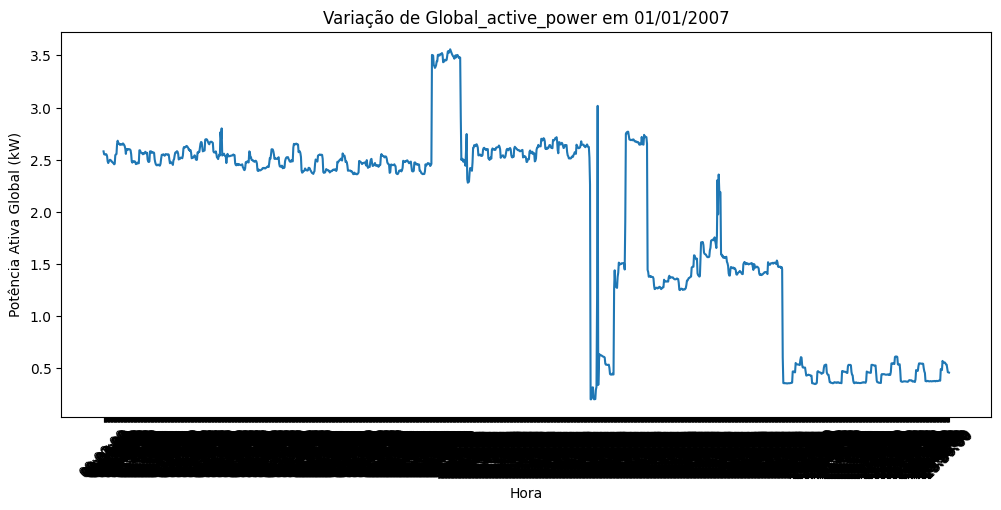

In [18]:
import matplotlib.pyplot as plt

# Seleciona um único dia, por exemplo, 1º de janeiro de 2007
dia_exemplo = df_2007[df_2007['Date'].dt.date == pd.to_datetime("2007-01-01").date()]

plt.figure(figsize=(12,5))
plt.plot(dia_exemplo['Time'], dia_exemplo['Global_active_power'])
plt.title("Variação de Global_active_power em 01/01/2007")
plt.xlabel("Hora")
plt.ylabel("Potência Ativa Global (kW)")
plt.xticks(rotation=45)
plt.show()


7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

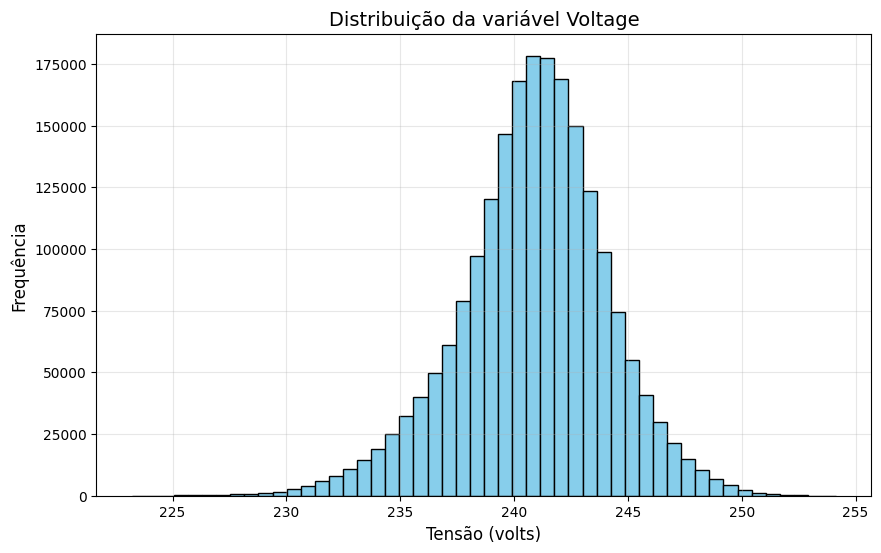

In [ ]:
# Converter Voltage para numérico (caso ainda esteja como objeto/string)
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Criar histograma
plt.figure(figsize=(10,6))
plt.hist(df['Voltage'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribuição da variável Voltage", fontsize=14)
plt.xlabel("Tensão (volts)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# A variável Voltage apresenta uma distribuição aproximadamente normal, centrada em torno de 240V,
# com a maior parte dos valores entre 235V e 250V. Isso indica que a rede elétrica é estável,
# apresentando apenas pequenas variações em torno da média.

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

Ano_Mes
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
2010-11    1.196854
Freq: M, Name: Global_active_pow

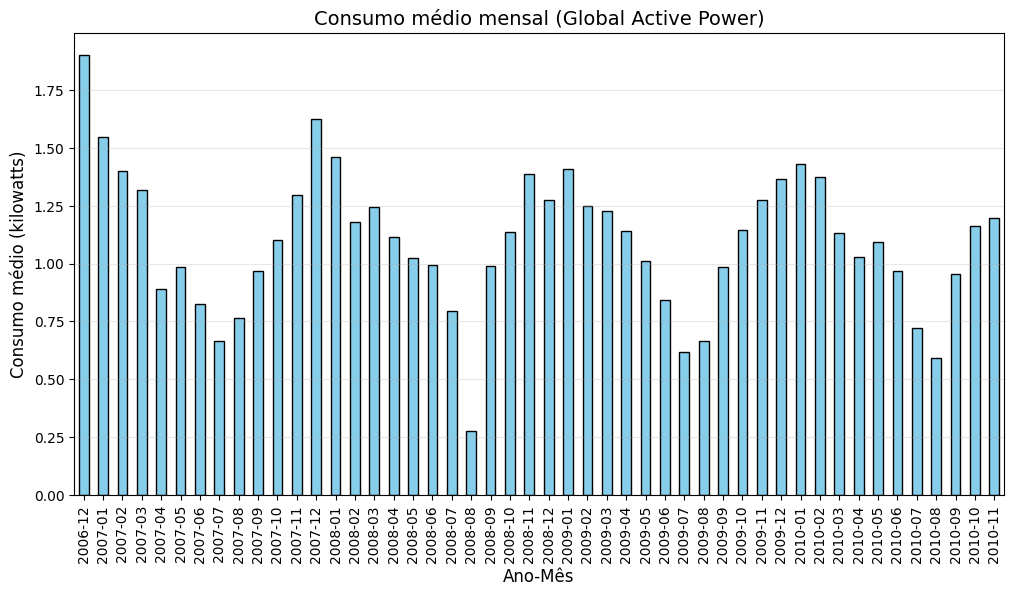

In [ ]:
# Converter a coluna Date para datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Criar coluna com ano-mês
df['Ano_Mes'] = df['Date'].dt.to_period('M')

# Calcular consumo médio por mês
consumo_mensal = df.groupby('Ano_Mes')['Global_active_power'].mean()

# Exibir resultado
print(consumo_mensal)

# Opcional: visualizar em gráfico
plt.figure(figsize=(12,6))
consumo_mensal.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Consumo médio mensal (Global Active Power)", fontsize=14)
plt.xlabel("Ano-Mês", fontsize=12)
plt.ylabel("Consumo médio (kilowatts)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [ ]:
# O consumo médio mensal apresenta variações significativas ao longo do período, sugerindo padrões sazonais e oscilações no uso de energia.

9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [19]:
# Garantir tipos corretos
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Consumo diário em kWh (cada valor de GAP é em kW medido por minuto → kWh = GAP/60)
consumo_diario_kWh = (df['Global_active_power'] / 60).groupby(df['Date']).sum()

# Encontrar o dia de maior consumo
dia_max = consumo_diario_kWh.idxmax()
valor_max = consumo_diario_kWh.max()

print(f"O dia de maior consumo foi {dia_max.date()} com {valor_max:.2f} kWh")


O dia de maior consumo foi 2006-12-23 com 79.56 kWh


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana.

In [ ]:
# Garantir que a coluna Date esteja em datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Criar coluna com dia da semana (0=segunda, 6=domingo)
df['DiaSemana'] = df['Date'].dt.dayofweek

# Calcular consumo médio de Global_active_power (em kWh por minuto → dividir por 60)
df['Consumo_kWh'] = df['Global_active_power'] / 60

# Separar semana (0 a 4) e fim de semana (5 e 6)
df['TipoDia'] = df['DiaSemana'].apply(lambda x: 'Semana' if x < 5 else 'Fim de semana')

# Média por tipo de dia
media_consumo = df.groupby('TipoDia')['Consumo_kWh'].mean()

print("Consumo médio de energia ativa global (kWh/min):")
print(media_consumo)


Consumo médio de energia ativa global (kWh/min):
TipoDia
Fim de semana    0.020571
Semana           0.017258
Name: Consumo_kWh, dtype: float64


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage
e Global_intensity.

In [ ]:
# Garantir que todas as variáveis estão no formato numérico
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # converte e substitui valores inválidos por NaN

# Calcular a matriz de correlação
correlacao = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()

print(correlacao)


                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.

In [ ]:
# Garantir que Sub_meterings estão como numéricos
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # converte para número e substitui valores inválidos por NaN

# Criar a variável Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Conferir as primeiras linhas
print(df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].head())


   Sub_metering_1  Sub_metering_2  Sub_metering_3  Total_Sub_metering
0             0.0             1.0            17.0                18.0
1             0.0             1.0            16.0                17.0
2             0.0             2.0            17.0                19.0
3             0.0             1.0            17.0                18.0
4             0.0             1.0            17.0                18.0


13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
# Garantir que a coluna Date esteja em datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Criar a variável Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

# Calcular a média de Global_active_power
media_global = df['Global_active_power'].mean()

# Criar coluna com Ano-Mês
df['AnoMes'] = df['Date'].dt.to_period('M')

# Calcular soma mensal de Total_Sub_metering
soma_mensal = df.groupby('AnoMes')['Total_Sub_metering'].sum()

# Filtrar meses onde soma mensal > média de Global_active_power
meses_acima = soma_mensal[soma_mensal > media_global]

print("Média de Global_active_power:", media_global)
print("\nMeses em que Total_Sub_metering ultrapassa a média de Global_active_power:")
print(meses_acima)


Média de Global_active_power: 1.0916150365006245

Meses em que Total_Sub_metering ultrapassa a média de Global_active_power:
AnoMes
2006-12    239123.0
2007-01    465285.0
2007-02    382462.0
2007-03    455892.0
2007-04    269998.0
2007-05    377317.0
2007-06    318462.0
2007-07    253600.0
2007-08    311404.0
2007-09    354493.0
2007-10    387212.0
2007-11    424179.0
2007-12    519444.0
2008-01    436847.0
2008-02    352756.0
2008-03    422057.0
2008-04    413629.0
2008-05    402611.0
2008-06    422280.0
2008-07    318957.0
2008-08    105802.0
2008-09    381248.0
2008-10    383208.0
2008-11    394569.0
2008-12    391912.0
2009-01    477209.0
2009-02    393948.0
2009-03    441769.0
2009-04    414947.0
2009-05    404717.0
2009-06    321132.0
2009-07    248690.0
2009-08    264304.0
2009-09    394293.0
2009-10    435962.0
2009-11    449447.0
2009-12    495200.0
2010-01    506368.0
2010-02    514572.0
2010-03    420313.0
2010-04    410763.0
2010-05    465108.0
2010-06    420356.0
2010-07 

14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

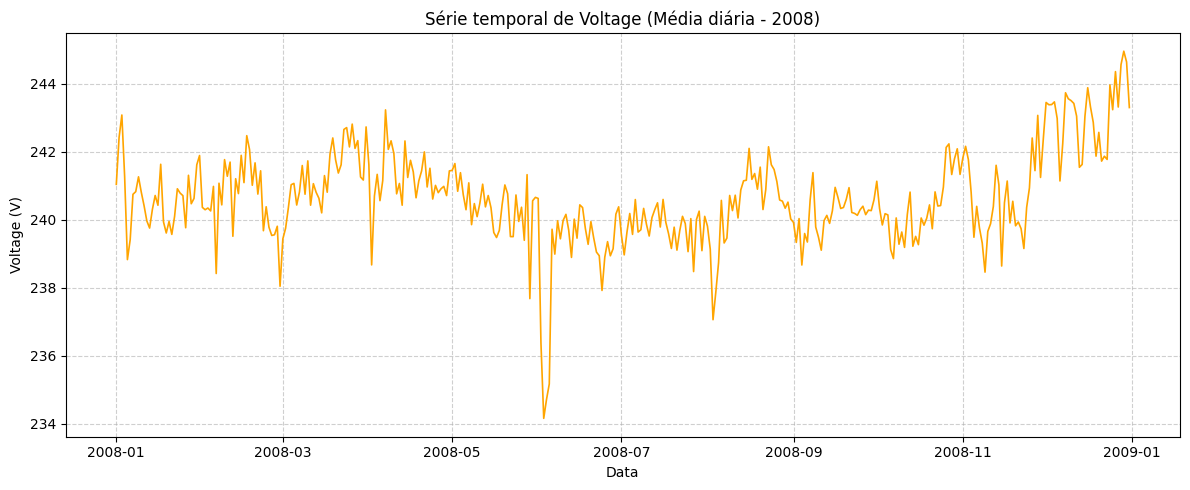

In [33]:
# Criar coluna Ano-Mês-Dia
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Filtrar apenas o ano de 2008
df_2008 = df[df['Date'].dt.year == 2008]

# Calcular média diária do Voltage
df_2008_diario = df_2008.groupby(df_2008['Date'].dt.date)['Voltage'].mean()

# Plotar gráfico suavizado (média diária)
plt.figure(figsize=(12,5))
plt.plot(df_2008_diario.index, df_2008_diario.values, color='orange', linewidth=1.2)

plt.title("Série temporal de Voltage (Média diária - 2008)")
plt.xlabel("Data")
plt.ylabel("Voltage (V)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

Consumo médio Verão (2008): 0.6851350820909604
Consumo médio Inverno (2008): 1.3082454548925284


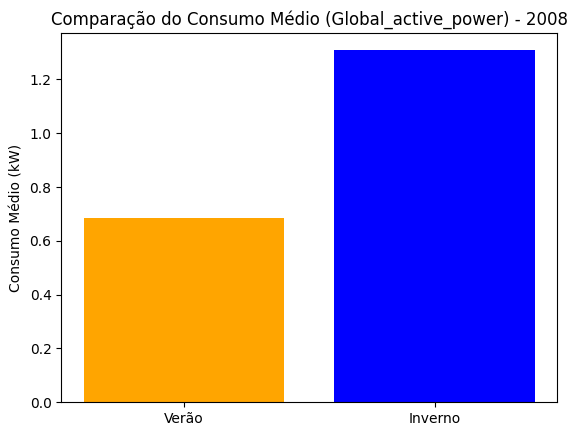

In [34]:
# Garantir que a coluna Date esteja em datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Criar colunas auxiliares
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Filtrar dados apenas de 2008 (ou de todo o dataset, se preferir)
df_2008 = df[df['year'] == 2008]

# Separar verão (junho, julho, agosto) e inverno (dezembro, janeiro, fevereiro)
verao = df_2008[df_2008['month'].isin([6,7,8])]
inverno = df_2008[df_2008['month'].isin([12,1,2])]

# Calcular médias de consumo
media_verao = verao['Global_active_power'].mean()
media_inverno = inverno['Global_active_power'].mean()

print("Consumo médio Verão (2008):", media_verao)
print("Consumo médio Inverno (2008):", media_inverno)

# Plotar gráfico comparativo
plt.bar(['Verão', 'Inverno'], [media_verao, media_inverno], color=['orange','blue'])
plt.title('Comparação do Consumo Médio (Global_active_power) - 2008')
plt.ylabel('Consumo Médio (kW)')
plt.show()

16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

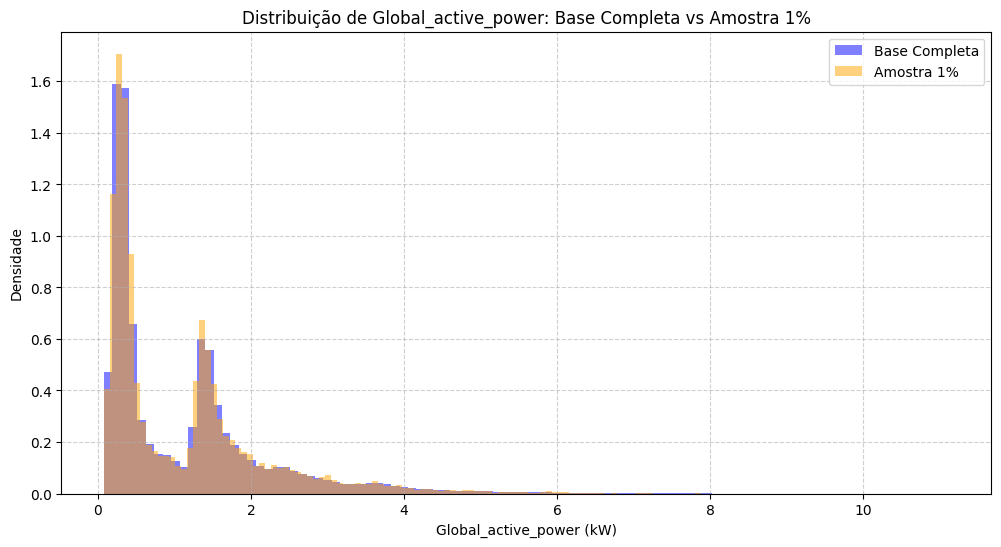

Média - Base Completa: 1.0916150365006245
Média - Amostra 1%   : 1.0974987796543982
Desvio Padrão - Base Completa: 1.0572941610941602
Desvio Padrão - Amostra 1%   : 1.049284443500287


In [35]:
# Amostragem de 1%
df_sample = df.sample(frac=0.01, random_state=42)  # random_state p/ reprodutibilidade

# Plotar histogramas comparativos
plt.figure(figsize=(12,6))

plt.hist(df['Global_active_power'], bins=100, alpha=0.5, label='Base Completa', color='blue', density=True)
plt.hist(df_sample['Global_active_power'], bins=100, alpha=0.5, label='Amostra 1%', color='orange', density=True)

plt.title("Distribuição de Global_active_power: Base Completa vs Amostra 1%")
plt.xlabel("Global_active_power (kW)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Estatísticas descritivas para reforçar a comparação
print("Média - Base Completa:", df['Global_active_power'].mean())
print("Média - Amostra 1%   :", df_sample['Global_active_power'].mean())
print("Desvio Padrão - Base Completa:", df['Global_active_power'].std())
print("Desvio Padrão - Amostra 1%   :", df_sample['Global_active_power'].std())

17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas
principais.

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Selecionar apenas as colunas numéricas principais
cols_numericas = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                  'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Instanciar o scaler
scaler = MinMaxScaler()

# Aplicar transformação
df_scaled = df.copy()
df_scaled[cols_numericas] = scaler.fit_transform(df[cols_numericas])

# Verificar resultado
print(df_scaled[cols_numericas].head())


          Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                         
NaT                  0.374796               0.300719  0.376090   
NaT                  0.478363               0.313669  0.336995   
NaT                  0.479631               0.358273  0.326010   
NaT                  0.480898               0.361151  0.340549   
NaT                  0.325005               0.379856  0.403231   

          Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Datetime                                                                    
NaT               0.377593             0.0          0.0125        0.548387  
NaT               0.473029             0.0          0.0125        0.516129  
NaT               0.473029             0.0          0.0250        0.548387  
NaT               0.473029             0.0          0.0125        0.548387  
NaT               0.323651             0.0          0.0125        0.548387 

18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

Tamanho de cada cluster:
Cluster
0    600
1    512
2    321
Name: count, dtype: int64 

Médias por cluster (perfil dos grupos):
         Global_active_power  Global_reactive_power     Voltage  \
Cluster                                                           
0                   1.176185               0.109595  241.464774   
1                   0.694771               0.130183  240.176933   
2                   1.568447               0.140242  240.713825   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Cluster                                                                    
0                4.944717        1.045858        0.700715        7.625192  
1                3.006578        0.579790        0.768137        4.048098  
2                6.629912        2.134256        3.262326        8.058111  


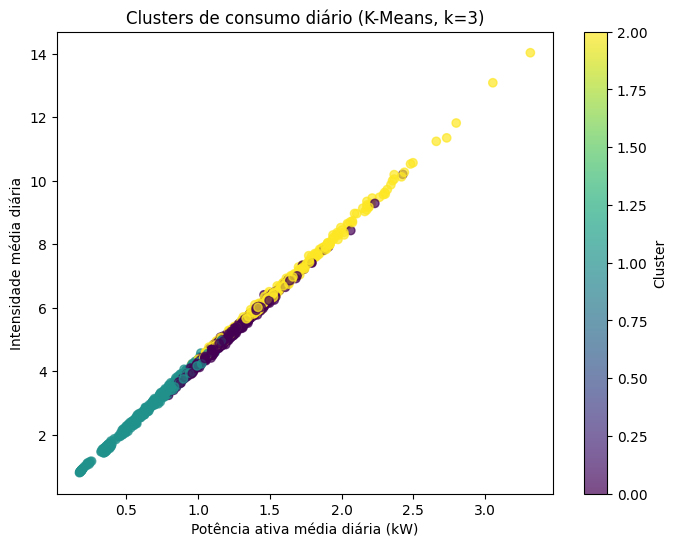

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1) Data em datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# 2) Base diária (médias por dia)
df_diario = df.groupby(df['Date'].dt.date).agg({
    'Global_active_power': 'mean',
    'Global_reactive_power': 'mean',
    'Voltage': 'mean',
    'Global_intensity': 'mean',
    'Sub_metering_1': 'mean',
    'Sub_metering_2': 'mean',
    'Sub_metering_3': 'mean'
})

# 3) Tratar NaN (opção A: dropar; se preferir, use fillna(df_diario.median()))
df_diario = df_diario.dropna()

# 4) Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df_diario)

# 5) K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# 6) Anexar rótulos e ver perfis
df_diario['Cluster'] = labels
print("Tamanho de cada cluster:")
print(df_diario['Cluster'].value_counts().sort_index(), "\n")

print("Médias por cluster (perfil dos grupos):")
print(df_diario.groupby('Cluster').mean())

# 7) Visualização simples (2D)
plt.figure(figsize=(8,6))
plt.scatter(df_diario['Global_active_power'], df_diario['Global_intensity'],
            c=df_diario['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("Potência ativa média diária (kW)")
plt.ylabel("Intensidade média diária")
plt.title("Clusters de consumo diário (K-Means, k=3)")
plt.colorbar(label="Cluster")
plt.show()


19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

<Figure size 1200x800 with 0 Axes>

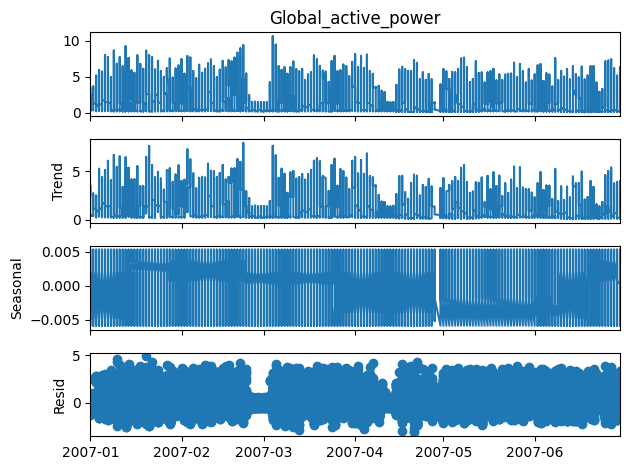

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Garantir que a data está no índice
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Selecionar 6 meses (exemplo: Jan a Jun de 2007)
df_6m = df.loc['2007-01-01':'2007-06-30']

# Série temporal apenas da variável de interesse
ts = df_6m['Global_active_power'].dropna()

# Decomposição (diária, pois são dados hora a hora)
result = seasonal_decompose(ts, model='additive', period=24)

# Plotar os componentes
plt.figure(figsize=(12,8))
result.plot()
plt.show()


20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Selecionar variáveis
X = df[['Global_intensity']].dropna()
y = df['Global_active_power'].dropna()

# Garantir alinhamento (mesmo índice)
X, y = X.align(y, join='inner', axis=0)

# Dividir em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliar desempenho
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficiente angular (β1):", model.coef_[0])
print("Intercepto (β0):", model.intercept_)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


Coeficiente angular (β1): 0.23762614172463653
Intercepto (β0): -0.008059125001929068
MSE: 0.002466502160434228
RMSE: 0.049663891917913844
MAE: 0.03410224606543469
R²: 0.9977990793633297


In [41]:
# O modelo de Regressão Linear Simples teve um desempenho excepcional, com erros extremamente baixos e um R² próximo de 1.
# Isso confirma que existe uma forte relação linear entre Global_intensity e Global_active_power.